
# New Zealand Crash Analysis System(CAS)
##Descriptive Analysis


In [42]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.io import gbq
from google.cloud import bigquery

#Upload the Data

In [22]:
pip install opendatasets --upgrade

In [23]:
import opendatasets as od
url = 'https://www.kaggle.com/datasets/januaryfirst/nzcasdata'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: januaryfirst
Your Kaggle Key: ··········


100%|██████████| 43.5M/43.5M [00:00<00:00, 58.1MB/s]


In [24]:
data_filename = './nzcasdata/Crash_Analysis_System_(CAS)_data.csv'

In [25]:
pip install plotly==5.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [26]:
df = pd.read_csv(data_filename)

#Clean the Data

In [27]:
pd.options.display.max_columns = 100

In [28]:
df.head(3)

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1793490.0,5770363.0,1,NaN,531200.0,0.0,0.0,0.0,1.0,0.0,West,2009/2010,OTEWA ROAD,OLD TE KUITI ROAD,NaN,Minor Crash,No,2010,0.0,East,0.0,0.0,0.0,Flat,1.0,NaN,0.0,NaN,0.0,Overcast,1003502.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,70.0,0.0,None,0.0,0.0,NaN,18.0,Ōtorohanga District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null
1,1727724.0,6010377.0,2,NaN,501815.0,0.0,0.0,0.0,3.0,0.0,South,2009/2010,SH 1N,WAIPU GORGE ROAD,NaN,Fatal Crash,Yes,2010,0.0,North,0.0,1.0,0.0,Hill Road,1.0,NaN,0.0,NaN,0.0,Bright sun,81300.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Northland Region,Nil,2-way,Sealed,0.0,0.0,2.0,0.0,100.0,0.0,None,0.0,0.0,NaN,2.0,Whangarei District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
2,1733610.0,5932491.0,3,NaN,505605.0,0.0,0.0,0.0,1.0,0.0,West,2010/2011,TAYLOR ROAD,WAIKOUKOU VALLEY ROAD,NaN,Fatal Crash,No,2010,0.0,North,1.0,1.0,0.0,Hill Road,0.0,NaN,0.0,NaN,0.0,Dark,215700.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,1.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,80.0,0.0,None,0.0,0.0,NaN,76.0,Auckland,Nil,0.0,0.0,0.0,1.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null


In [29]:
df["areaUnitID"] = df["areaUnitID"].apply(str)
df["meshblockId"] = df["meshblockId"].apply(str)
df["tlaId"] = df["tlaId"].apply(str)
df["crashYear"] = df["crashYear"].apply(str)
df["speedLimit"] = df["speedLimit"].apply(str)
df['advisorySpeed'] = df['advisorySpeed'].apply(str)

In [30]:
#merge columns to be analysed together
df.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSi

In [31]:
#Road Surfaces that were crashed into - cliff/bank, debris, ditch, kerb, overbank, slip/flood, waterRiver
df['surfaceCrashed'] = df['cliffBank'] + df['debris'] + df['ditch'] + df['kerb'] + df['overBank'] +df['slipOrFlood'] + df['waterRiver']
df = df.drop(['cliffBank', 'debris', 'ditch', 'kerb', 'overBank', 'slipOrFlood', 'waterRiver'], axis = 1)

In [32]:
#Objects that were crashed into - fence, guardrail, house/building, thrown/dropped, otherobject, parkedvehicle, phonbebox, post/pole, roadworks, bridge, trafficisland, trafficsign, train, tree
df['objectsCrashed'] = df['fence'] + df['guardRail'] + df['houseOrBuilding'] + df['objectThrownOrDropped'] + df['otherObject'] + df['phoneBoxEtc'] + df['postOrPole'] + df['roadworks'] + df['bridge'] + df['trafficIsland'] + df['trafficSign'] + df['train'] + df['tree']
df = df.drop(['fence', 'guardRail', 'houseOrBuilding', 'objectThrownOrDropped', 'otherObject', 'phoneBoxEtc', 'postOrPole', 'roadworks', 'bridge', 'trafficIsland', 'trafficSign', 'train',  'tree'], axis = 1)

In [33]:
#Reorganizing columns
new_columns = ['crashYear', 'speedLimit', 'temporarySpeedLimit', 'advisorySpeed',
          'region', 'areaUnitID', 'meshblockId',  'tlaId', 'tlaName', 'urban',
           'bicycle', 'bus', 'carStationWagon', 'moped', 'motorcycle','schoolBus', 'taxi',  'truck',  'vanOrUtility', 'otherVehicleType','unknownVehicleType','suv',
          'weatherA', 'weatherB', 'light','holiday', 'fatalCount', 'minorInjuryCount', 'seriousInjuryCount',
        'crashFinancialYear', 'crashLocation1', 'crashLocation2',  'crashSeverity', 'crashDirectionDescription', 'crashRoadSideRoad',
       'crashSHDescription', 'directionRoleDescription','flatHill',  'intersection',  'NumberOfLanes', 'parkedVehicle', 'pedestrian','trafficControl',
        'roadCharacter', 'roadLane', 'roadSurface',
         'strayAnimal', 'streetLight',  'vehicle', 'surfaceCrashed', 'objectsCrashed']

df= df.reindex(columns = new_columns)

In [34]:
df['crashYear'] = pd.to_datetime(df['crashYear'], format = "%Y").dt.year

In [35]:
df.dtypes

crashYear                      int64
speedLimit                    object
temporarySpeedLimit          float64
advisorySpeed                 object
region                        object
areaUnitID                    object
meshblockId                   object
tlaId                         object
tlaName                       object
urban                         object
bicycle                      float64
bus                          float64
carStationWagon              float64
moped                        float64
motorcycle                   float64
schoolBus                    float64
taxi                         float64
truck                        float64
vanOrUtility                 float64
otherVehicleType             float64
unknownVehicleType           float64
suv                          float64
weatherA                      object
weatherB                      object
light                         object
holiday                       object
fatalCount                   float64
m

In [36]:
#Fixing missing values
df['weatherA'] = df['weatherA'].str.replace('Null', 'Unknown')
df['streetLight'] = df['streetLight'].str.replace('Null','None')
df[['bicycle', 'bus', 'carStationWagon', 'moped', 'motorcycle', 'schoolBus', 'taxi', 'truck', 'vanOrUtility', 'otherVehicleType', 'suv' ]] = df[['bicycle', 'bus', 'carStationWagon', 'moped', 'motorcycle', 'schoolBus', 'taxi', 'truck', 'vanOrUtility', 'otherVehicleType', 'suv']].fillna(0)
df[['objectsCrashed', 'surfaceCrashed', 'pedestrian', 'strayAnimal']] = df[['objectsCrashed', 'surfaceCrashed', 'pedestrian', 'strayAnimal']].fillna(0)

In [37]:
#Removing uninformative, unnecessary columns
x = df['intersection'].isna().sum() / len(df)
y = df['temporarySpeedLimit'].isna().sum() / len(df)
z = df['crashRoadSideRoad'].isna().sum() / len(df)
a = len(df.loc[df['roadCharacter'] == 'Nil']) / len(df)
b = len(df.loc[df['trafficControl'] == 'Unknown']) / len(df) + len(df.loc[df['trafficControl'] == 'Nil']) / len(df)
x, y, z, a, b

(1.0, 0.9850024692641592, 1.0, 0.9618248047796043, 0.662191048020071)

In [38]:
df = df.drop(['intersection' , 'temporarySpeedLimit', 'crashRoadSideRoad', 'roadCharacter', 'trafficControl' ], axis = 1)

#Connecting to SQL

In [39]:
df.to_gbq(destination_table = 'CAS_data.query_table',
          project_id = 'nz-cas-analysis',
          if_exists = 'replace')

100%|██████████| 1/1 [00:00<00:00, 5540.69it/s]


#SQL QUERYING

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
project_id = "nz-cas-analysis"
client = bigquery.Client(project = project_id)

###Yearly trends

In [ ]:
query = ('''SELECT crashYear, count(crashYear) as crash_total_per_year,
                  sum(fatalCount) as Fatalities,
                  sum(seriousInjuryCount) as SeriousInjuries,
                  sum(minorInjuryCount) as MinorInjuries
FROM CAS_data.query_table
WHERE crashYear != '2022'
GROUP BY crashYear
ORDER BY crashYear;''')
yearly_trends = client.query(query).to_dataframe()

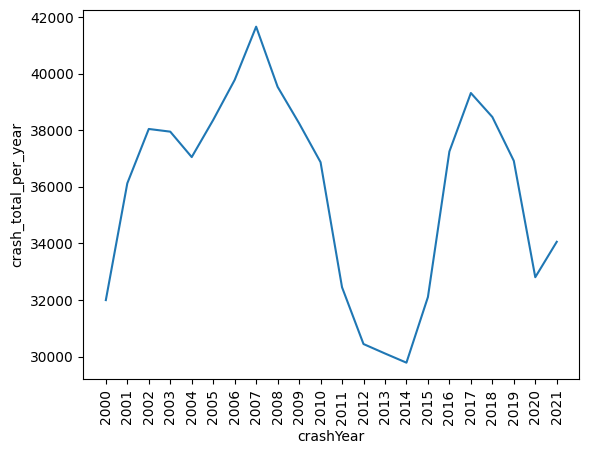

In [ ]:
sns.lineplot(x = yearly_trends.crashYear, y = yearly_trends.crash_total_per_year)
plt.xticks(rotation=90)
plt.show()

<Axes: >

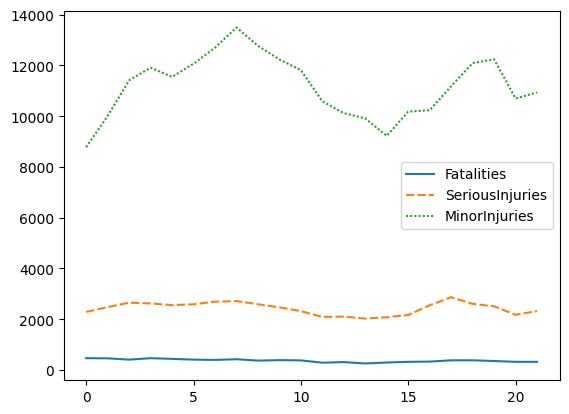

In [ ]:
sns.lineplot(data = yearly_trends[['Fatalities', 'SeriousInjuries', 'MinorInjuries']])

In [ ]:
yearly_trends.to_csv("Yearly_Trends.csv")

In [ ]:
holidays = df.groupby('holiday')['holiday'].count()
holidays = holidays / len(df) * 100
holidays

holiday
Christmas New Year    2.489810
Easter                1.156160
Labour Weekend        0.854526
Queens Birthday       0.970749
Name: holiday, dtype: float64

###Injuries

In [ ]:
injuries_query = ('''SELECT crashSeverity, count(crashSeverity) as Total
FROM `CAS_data.query_table`
GROUP BY crashSeverity''')
injuries = client.query(injuries_query).to_dataframe()

<Axes: xlabel='crashSeverity', ylabel='Total'>

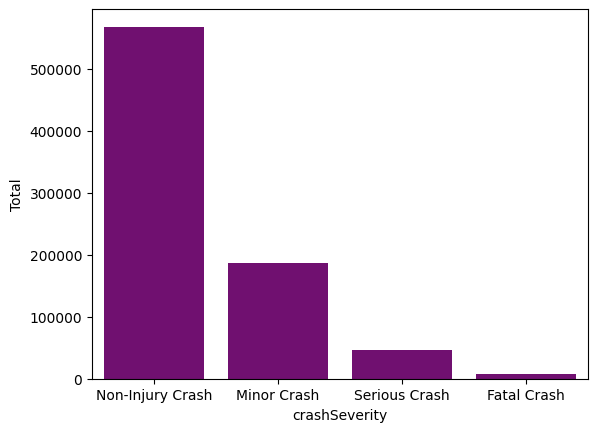

In [ ]:
sns.barplot(x = injuries.crashSeverity, y = injuries.Total, color = "purple")

In [ ]:
injuries.to_csv("injuries.csv")

###Geographical trends


In [ ]:
geographical_query = ('''SELECT region,
              count(crashYear) as TotalCrashes,
              sum(fatalCount) as Fatalities,
              sum(seriousInjuryCount) as seriousInjuries,
              sum(minorInjuryCount) as minorInjuries
FROM CAS_data.query_table
WHERE region IS NOT null
GROUP BY region
ORDER BY TotalCrashes DESC
''')
geographical_data = client.query(geographical_query).to_dataframe()

Text(0.5, 1.0, 'Crashes per Region')

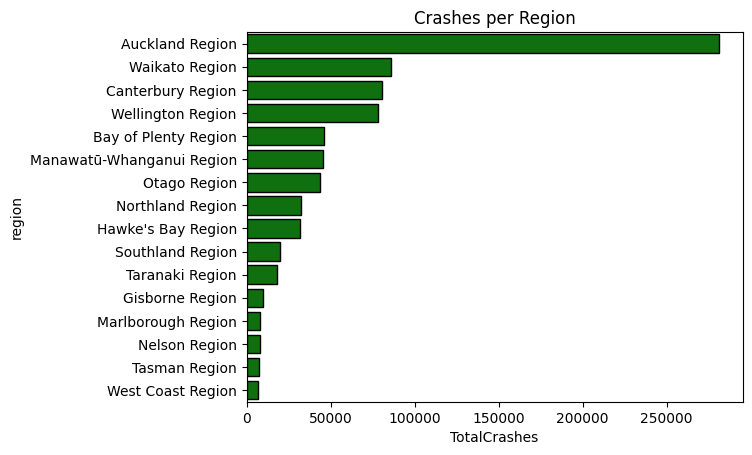

In [ ]:
sns.barplot( x = "TotalCrashes", y = "region", data = geographical_data, color = "green", edgecolor = "black").set_title("Crashes per Region")

Text(0.5, 1.0, 'Crashes per Capita')

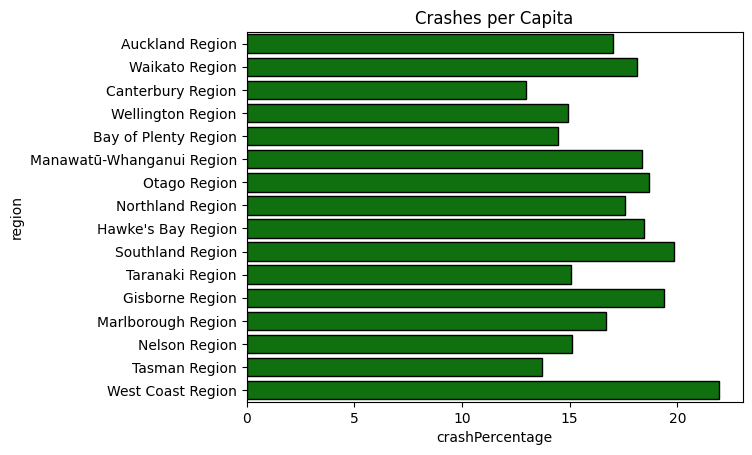

In [ ]:
#compare number of accidents per capita (i.e. region)
populations = [1654800, 475600, 622800, 525900, 320800, 247500, 235000, 185800, 172400, 100500, 121200, 49500, 48700, 52700, 54000, 32400 ]
geographical_data['regionalPopulation'] = populations
geographical_data['crashPercentage']  = geographical_data['TotalCrashes'] / geographical_data['regionalPopulation'] * 100
sns.barplot(x = geographical_data.crashPercentage, y = geographical_data.region, color = "green", edgecolor = "black" ).set_title("Crashes per Capita")

Text(0.5, 1.0, 'Fatalities per region')

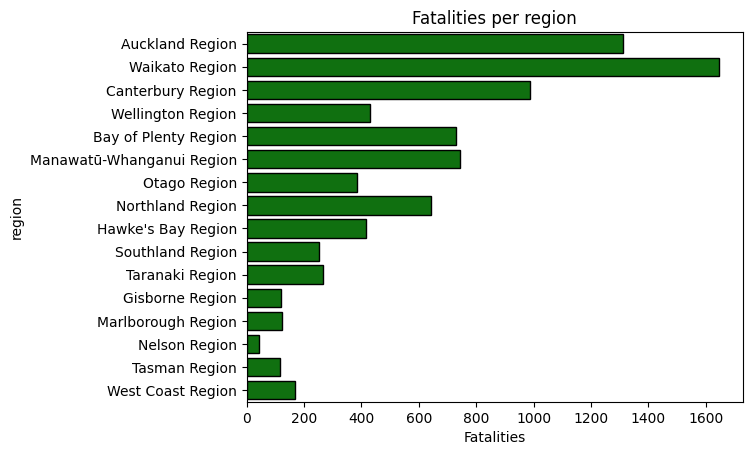

In [ ]:
sns.barplot(x = "Fatalities", y = "region", data = geographical_data, color = "green", edgecolor = "black").set_title("Fatalities per region")

Text(0.5, 1.0, 'Percentage of Fatalities per region')

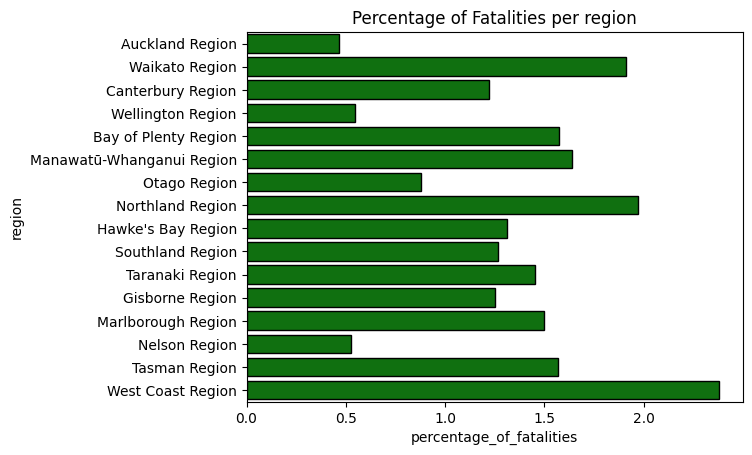

In [ ]:
geographical_data["percentage_of_fatalities"] = geographical_data["Fatalities"] / geographical_data["TotalCrashes"] * 100
sns.barplot(x = "percentage_of_fatalities", y = "region", data = geographical_data, color = "green", edgecolor = "black").set_title("Percentage of Fatalities per region")

In [ ]:
geographical_data.to_csv("geographical_data.csv")

###Road Trends

In [ ]:
speed_query = ('''SELECT speedLimit, COUNT(speedLimit) as Total,
      SUM(seriousInjuryCount) as SeriousInjuries
FROM CAS_data.query_table
GROUP BY speedLimit
HAVING Total > 10
ORDER BY total DESC;''')
speed = client.query(speed_query).to_dataframe()

<Axes: xlabel='Total', ylabel='speedLimit'>

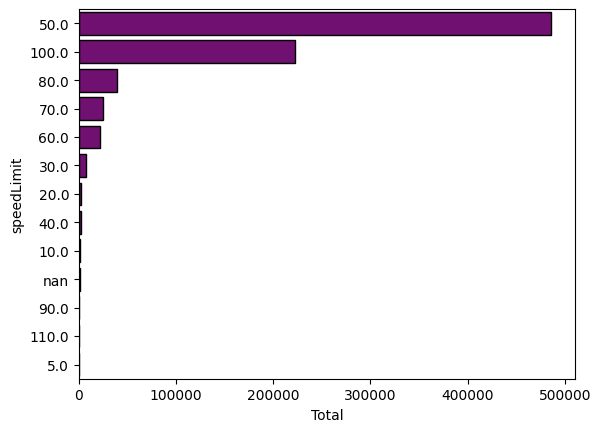

In [ ]:
sns.barplot(x = "Total", y = "speedLimit", data = speed, color = "purple", edgecolor = "black")

In [ ]:
lanes_query = ('''SELECT numberofLanes, count(numberofLanes) as Total
FROM CAS_data.query_table
GROUP BY numberofLanes
HAVING Total > 10''')
lanes = client.query(lanes_query).to_dataframe()

<Axes: xlabel='numberofLanes', ylabel='Total'>

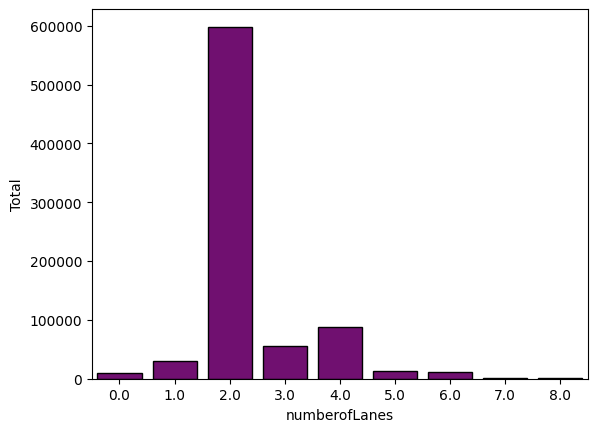

In [ ]:
sns.barplot(x = "numberofLanes", y = "Total", data = lanes, color = "purple", edgecolor = "black")

In [ ]:
light_query = ('''SELECT light, count(light) as Total
FROM CAS_data.query_table
GROUP BY light
HAVING Total > 10;''')
light = client.query(light_query).to_dataframe()

<Axes: xlabel='Total', ylabel='light'>

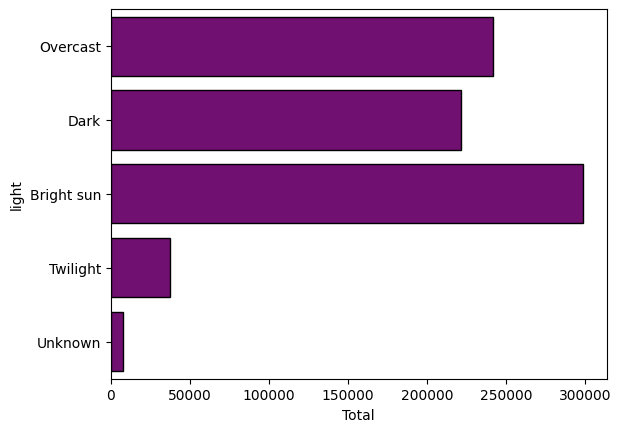

In [ ]:
sns.barplot(x = "Total", y = "light", data = light, color = "purple", edgecolor = "black")

In [ ]:
weather_query = ('''SELECT weatherA, count(weatherA) as Total
FROM CAS_data.query_table
GROUP BY weatherA
HAVING Total > 10;''')
weather = client.query(weather_query).to_dataframe()

<Axes: xlabel='Total', ylabel='weatherA'>

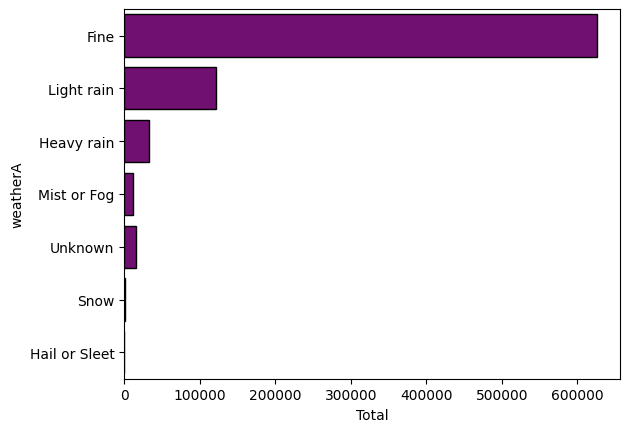

In [ ]:
sns.barplot(x = "Total", y = "weatherA", data = weather, color = "purple", edgecolor = "black")

###Fatalitites and serious Injuries

In [ ]:
strong_cases_query = ('''WITH fatalities AS (
  SELECT * FROM CAS_data.query_table
  WHERE crashSeverity = "Fatal Crash" or crashSeverity = "Serious Crash"
)

SELECT flatHill, numberofLanes, roadLane, streetLight, light, weatherA, speedlimit
FROM fatalities;''')
strong_cases = client.query(strong_cases_query).to_dataframe()

<Axes: xlabel='speedlimit', ylabel='Count'>

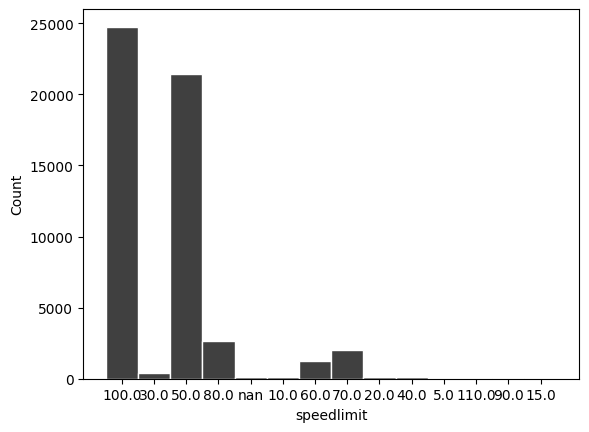

In [ ]:
sns.histplot(x = "speedlimit", data = strong_cases, color = "black", edgecolor = "white")

<Axes: xlabel='flatHill', ylabel='Count'>

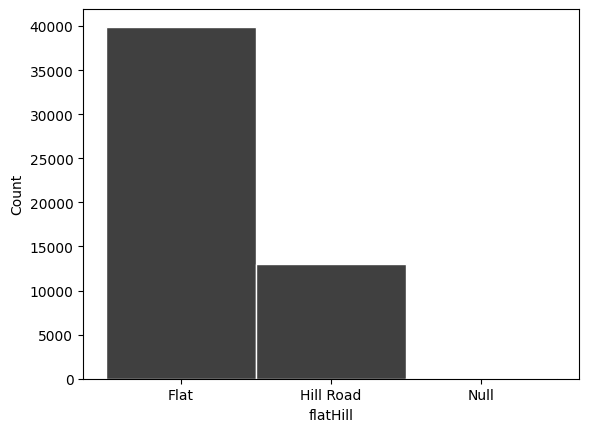

In [ ]:
sns.histplot(x = "flatHill", data = strong_cases, color = "black", edgecolor = "white")

<Axes: xlabel='roadLane', ylabel='Count'>

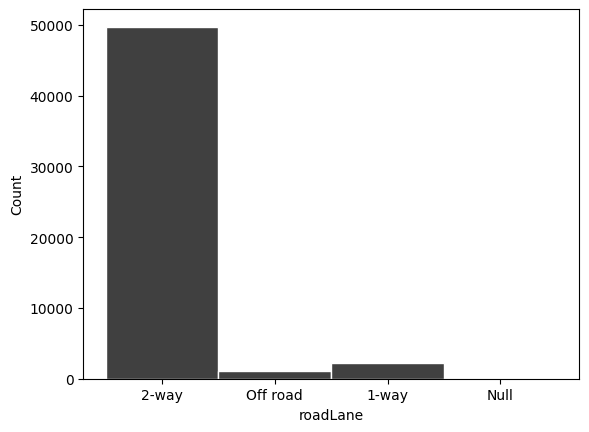

In [ ]:
sns.histplot(x = strong_cases["roadLane"],  color = "black", edgecolor = "white")

<Axes: xlabel='streetLight', ylabel='Count'>

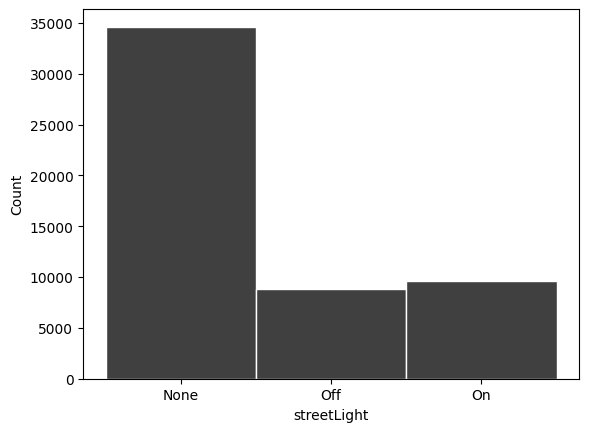

In [ ]:
sns.histplot(x = "streetLight", data = strong_cases, color = "black", edgecolor = "white")

<Axes: xlabel='light', ylabel='Count'>

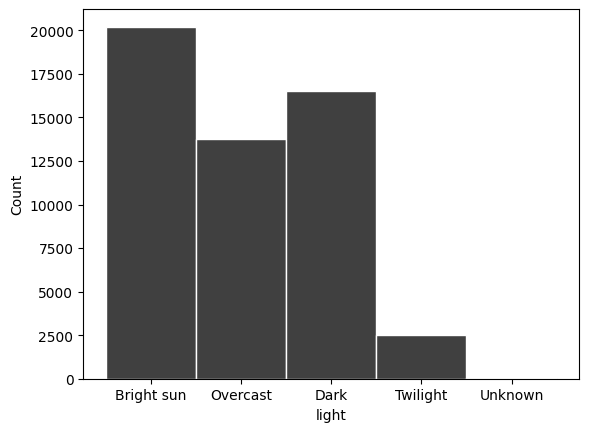

In [ ]:
sns.histplot(x = "light", data = strong_cases, color = "black", edgecolor = "white")

In [43]:
#Which vehicles do most fatal crashes occur in
fatal_crashes = df.query("fatalCount >= 1")
pivot = pd.pivot_table( fatal_crashes, index = ["region"], values = ["bicycle", "bus", "carStationWagon", "moped", "motorcycle", "suv", "unknownVehicleType", "schoolBus", "taxi", "truck", "otherVehicleType" ], aggfunc= np.sum)
pivot

,bicycle,bus,carStationWagon,moped,motorcycle,otherVehicleType,schoolBus,suv,taxi,truck,unknownVehicleType
region,,,,,,,,,,,
Auckland Region,43.0,41.0,1139.0,2.0,171.0,9.0,3.0,155.0,12.0,171.0,0.0
Bay of Plenty Region,15.0,12.0,543.0,5.0,96.0,12.0,3.0,89.0,0.0,127.0,1.0
Canterbury Region,48.0,20.0,716.0,6.0,129.0,10.0,2.0,118.0,1.0,177.0,0.0
Gisborne Region,4.0,2.0,62.0,1.0,7.0,0.0,0.0,15.0,0.0,22.0,0.0
Hawke's Bay Region,15.0,1.0,284.0,0.0,53.0,2.0,0.0,41.0,1.0,88.0,1.0
Manawatū-Whanganui Region,18.0,5.0,575.0,5.0,75.0,14.0,1.0,65.0,2.0,149.0,0.0
Marlborough Region,2.0,0.0,68.0,0.0,15.0,3.0,0.0,19.0,0.0,26.0,0.0
Nelson Region,3.0,0.0,33.0,0.0,7.0,0.0,0.0,6.0,0.0,5.0,0.0
Northland Region,12.0,6.0,494.0,2.0,74.0,13.0,3.0,93.0,2.0,97.0,0.0


###Involved Parties

In [6]:
vehicles_query = ('''WITH vehicles AS (SELECT SUM(carStationWagon) AS CarsStationWagons,
      SUM(bicycle) AS Bicycles,
      SUM(bus) AS Buses,
      SUM(moped) AS Mopeds,
      SUM(motorcycle) AS Motorcycles,
      SUM(otherVehicleType) + SUM(unknownVehicleType) AS OtherVehicles ,
      SUM(schoolBus) AS schoolBuses,
      SUM(suv) AS SUVs,
      SUM(taxi) AS Taxis,
      SUM(truck) AS Trucks
FROM CAS_data.query_table)

SELECT Vehicle, Total
FROM vehicles
UNPIVOT(Total FOR Vehicle in (CarsStationWagons, Bicycles, Buses, Mopeds, Motorcycles, OtherVehicles, SchoolBuses, SUVs, Taxis, Trucks ))

''')
vehicles = client.query(vehicles_query).to_dataframe()

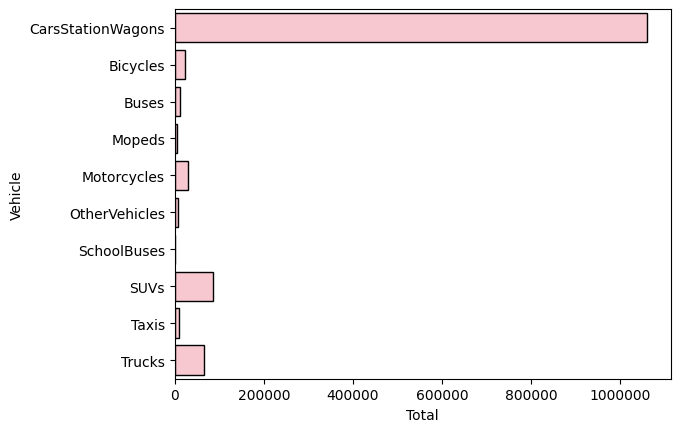

In [18]:
sns.barplot( x = "Total", y = "Vehicle", data = vehicles, color = "pink", edgecolor = "black")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [14]:
involved_query = ('''SELECT Involved, Total FROM
(SELECT sum(objectsCrashed) AS ObjectsCrashedInto,
       sum(surfaceCrashed) AS surfacesCrashedInto,
       sum(parkedVehicle) AS VehiclesCrashedInto,
       sum(pedestrian) AS PedestriansInvolved,
       sum(strayAnimal) AS AnimalsInvolved
FROM CAS_data.query_table) involved
UNPIVOT (Total FOR Involved IN (ObjectsCrashedInto,surfacesCrashedInto,VehiclesCrashedInto, PedestriansInvolved, AnimalsInvolved) )''')
involved = client.query(involved_query).to_dataframe()

<Axes: xlabel='Total', ylabel='Involved'>

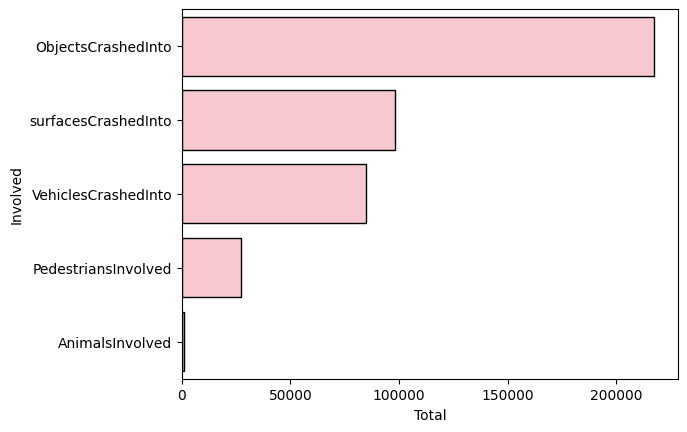

In [21]:
sns.barplot(x = "Total", y = "Involved", data = involved, color = "pink", edgecolor = "black")

#Summary and Insights

Most crashes occured in the Auckland, Canterbury and Waikato Region
note: 3084 crashes had unknown regions

Most injuries and fatalities followed the same trend as overall accidents. When accidents were at an all time high, so were injuries and fatalities.
Note: the number of accidents being much lower in 2021 may be due to incomplete data, so that number won't be taken into consideration.

A sigificant amount of crashes occured at giveway sings (143645), traffic signals (79555) and stop signs (49080)

2.5% of all crashes occured on christmas and new years day. Around 1% of crashes occured on each Easter, Labour weekend and Queen's birthday

The largest proportion of vehicles involved in both fatal/serious crashes and in general crashes were cars and station wagons


The largest number of crashes occured within 50-100kmp/h areas, with the most crashes occuring on 50km/h roadsm and within 2-5 lanes

Most fatal crashes occur in 100km/h areas

644500 crashes occured on flat roads and 157225 occured on hilly roads

In West coast, northland and Waikato, around 2% of all crashes were fatal